# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Цель: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Предоставлены данные до 2016 года. Данные за 2016 год могут быть неполными. Необходимо спланировать кампанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


<details>
<summary> Описание данных </summary>

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB
    
</details>

*Шаги:*

1. [Изучение общей информации](#id-section1)
2. [Подготовка данных](#id-section2)
3. [Исследовательский анализ данных](#id-section3)
4. [Портрет пользователя каждого региона](#id-section4)
5. [Проверка гипотез](#id-section5)
6. [Вывод](#id-section6)

<div id='id-section1'/>

### Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

<div id='id-section2'/>

### Шаг 2. Подготовка данных

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#приведем название столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [6]:
#заменим тип данных на целочисленный в колонках Year_of_Release и Critic_Score
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [7]:
games['critic_score'] = games['critic_score'].astype('Int64')

In [8]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
#в столбце с названием игр и жанрами по 2 пропуска, чтобы сохранить сумму выручки, заменим NaN
games.loc[games['name'].isna() == True, 'name'] = 'unknown'

In [10]:
games.loc[games['genre'].isna() == True, 'genre'] = 'unknown'

In [11]:
games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
unknown            2
Name: genre, dtype: int64

In [12]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [13]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [14]:
games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [15]:
games['critic_score'].value_counts()

70    256
71    254
75    245
78    240
73    238
     ... 
29      3
22      1
21      1
17      1
13      1
Name: critic_score, Length: 82, dtype: int64

In [16]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
0.9       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце user_score чаще всего встречается аббревиатура TBD, от английского To Be Determined (будет определено позже) . На текущий момент рейтинга нет , какой он будет - неизвестно. Поэтому данные значения можно заменить на NaN.

In [17]:
#заменим тип данных в стоблце user_score, tbd заменится на NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16715 non-null float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB


In [19]:
games[(games['critic_score'].isna() == True) & (games['user_score'].isna() == True) & (games['rating'].isna() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Вывод: В таблице 16715 строк. В столбцах с названием игр и жанрами есть по 2 пропущенных значения. Заменила пропуски на "unknown", чтобы сохранить сумму продаж в регионах. В более чем 200 строках отсутствует год выпуска. Строки удалять не стала по той же причине. Добавила столбец с суммой продаж во всех регионах.

Много пропущенных значений в столбцах critic_score, user_score и rating. Видимо, эти данные отсутствовали в открытых источниках, откуда была взята информация. В большинстве случаев они пропущены в одних и тех же строках. Таких строк больше 6,5 тыс. Не удаляем, так как потеряем боьшой объем данных.
В столбце user_score часто встречалась аббревиатура TBD, от английского To Be Determined, что означает будет определено позже. То есть рейтинг нам неизвестен, поэтому данные значения заменила на NaN.

Заменила тип данных на целочисленный в столбцах с годом выпуска и оценкой критиков. В столбце user_score строковый тип данных заменила на вещественный.

<div id='id-section3'/>

### Шаг 3. Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы.**

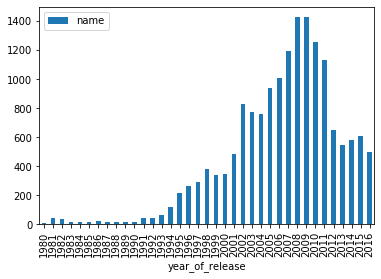

In [20]:
games.pivot_table(index=['year_of_release'], values = 'name', aggfunc = 'count').plot(kind='bar')

График представляет собой нормальное распределение, скошенное влево. Плавный рост начинается в 90-х годах. Пик приходится на 2008-2009 года.Затем идет спад, возможно, потому что приобрели большую популярность онлайн-игры. Кроме того, мог сказаться мировой финансовый кризис 2008 года. Для дальнейшего анализа данные за все периоды не нужны, т.к. технологии и потребности пользователей значительно изменились. Период определим ниже.

**Посмотрим, как менялись продажи по платформам.**

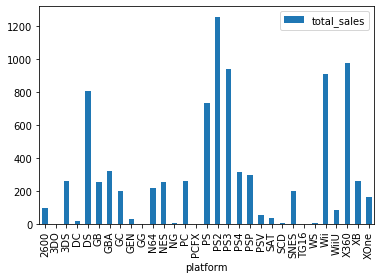

In [21]:
games.pivot_table(index=['platform'], values = 'total_sales', aggfunc = 'sum').plot(kind='bar')

In [22]:
#выделим топ-10 платформ
games.pivot_table(index=['platform'], values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


С наибольшими суммарными продажами выделяются 6 платформ: PS2, X360, PS3, Wii, DS, PS

In [24]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

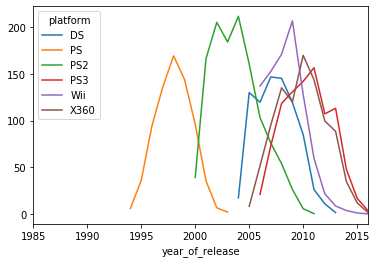

In [25]:
#построим распределение по годам
(
games
    .query('platform in @top_platform')
    .pivot_table(index=['year_of_release'], columns='platform', values = 'total_sales', aggfunc = 'sum')
    .plot()
)

Из графика видно, что в среднем "срок жизни" платформы 10 лет. Новый платформы приходят на смену старым на примере PS-PS2-PS3 каждые 5 лет. 
Поэтому для дальнейшей работы возьмем данные за последние 10лет, т.е. с 2006 года.

In [26]:
games_new = games.query('year_of_release >= 2006')

In [27]:
#выделим топ-платформ по суммарным продажам за выбранный период
games_new.pivot_table(index=['platform'], values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
X360,952.99
PS3,931.34
Wii,891.18
DS,655.35
PS4,314.14
PS2,265.80
3DS,257.81
PSP,238.63
PC,163.42


Лидируют по продажам следующие платформы: X360, PS3, Wii, DS

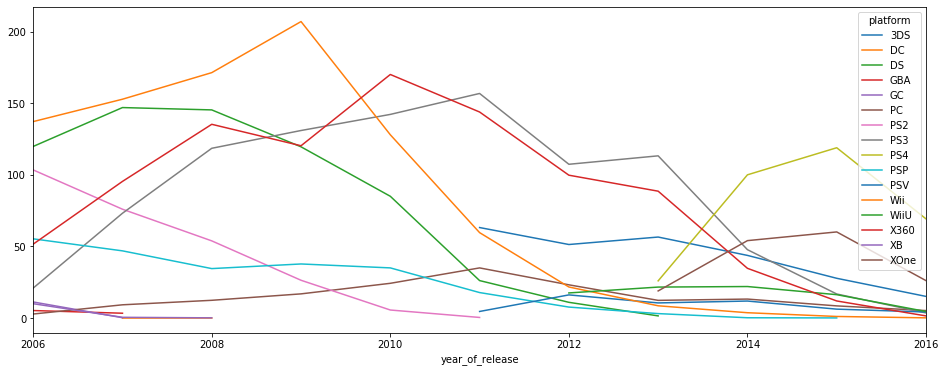

In [28]:
#построим распределение по годам
games_new.pivot_table(index=['year_of_release'], columns='platform', values = 'total_sales', aggfunc = 'sum').plot(figsize=(16,6))

Видим, что у платформ, имеющих в свое время большие продажи, сейчас продажи упали. Средний "срок жизни" таких платформ как DS, X360 подходит к концу. Рассмотрим поближе последие годы.

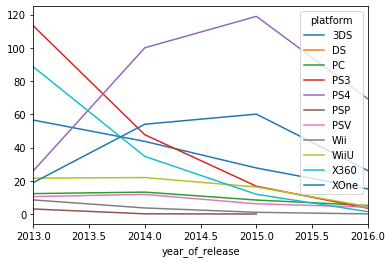

In [29]:
games_new.query('year_of_release > 2012').pivot_table(index=['year_of_release'], columns='platform', values = 'total_sales', aggfunc = 'sum').plot()

В последние годы популярностью пользуются PS4 и XOne.

Кроме того во всех периодах игроки пользуются компьютером, поэтому несмотря на невысокие продажи, данную платформу рассмотрим тоже, т.к. она не поддается старению. Еще бы добавила WiiU, т.к. предыдущая платформа Wii уже устарела, а на новой платформе продажи идут стабильно. Возможен рост.

Таким образом выделила 4 потенциально прибыльные платформы: 'PS4', 'XOne', 'WiiU', 'PC' 
Платформы 'X360', 'PS3', 'Wii', 'DS' лидировали по продажам за последние 10 лет.

**Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.**

In [30]:
#возьмем потенциально прибыльные платформы
top_platform_new = ['PS4', 'XOne', 'WiiU', 'PC']

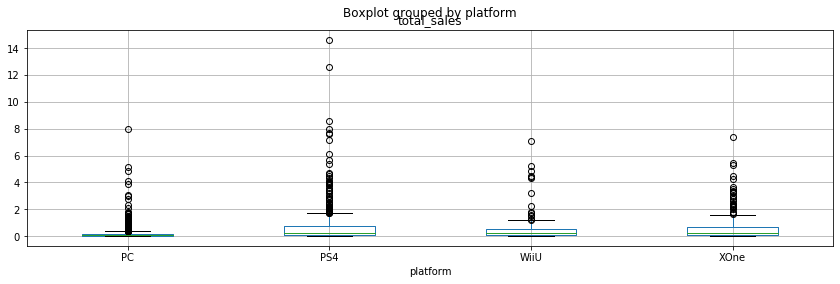

In [31]:
games_new.query('platform in @top_platform_new').boxplot('total_sales', by='platform', figsize=(14, 4))

(0, 3)

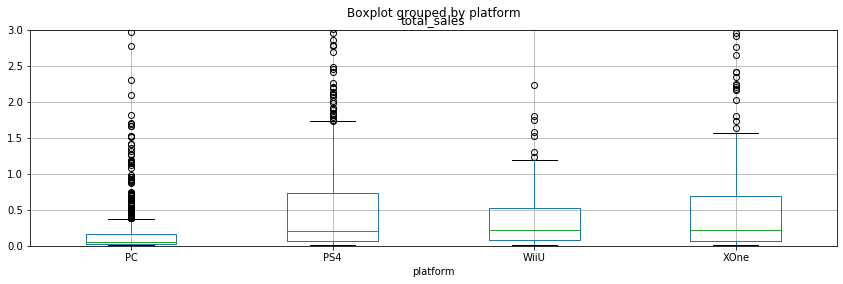

In [32]:
#рассмотрим ближе
a=games_new.query('platform in @top_platform_new').boxplot('total_sales', by='platform', figsize=(14, 4))
a.set_ylim(0,3)

Мы видим, что на новых потенциально прибыльных платформах медиана по продажам примерно на одном уровне , не считая компьютер. Там медиана ниже. При этом у каждой платформы есть игры, продажи которых значительно превышают средние показатели. Больше всего таких игр на платформе PS4.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

In [33]:
#возьмем для примера X360, как самую прибыльную платформу последнего 10-летия
games_x360 = games_new.query('platform == "X360"')

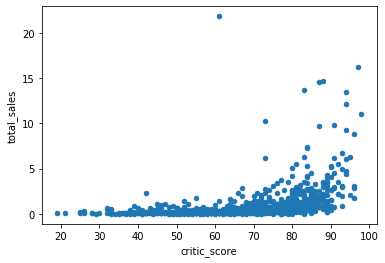

In [34]:
games_x360.plot(x='critic_score', y='total_sales', kind='scatter')

In [35]:
games_x360['critic_score'].astype('float64').corr(games_x360['total_sales'])

0.39630669748604186

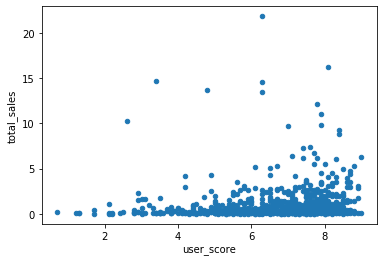

In [36]:
games_x360.plot(x='user_score', y='total_sales', kind='scatter')

In [37]:
games_x360['user_score'].corr(games_x360['total_sales'])

0.11576213224310163

Корреляции между отзывами и продажами нет. Но при этом на диаграмме рассеяния мы видим, что количество продаж выше у игр с более высокой оценкой. То есть и оценка критиков и пользовательская оценка влияют на продажи.  
Можно также предположить, что на платформе выпускалось много середнячков и провальных игр, но также существенное количество игр-"суперзвезд".

In [38]:
#посмотрим на всех платформах
games_new['critic_score'].astype('float64').corr(games_new['total_sales'])

0.23671025003954374

In [39]:
games_new['user_score'].corr(games_new['total_sales'])

0.08090638980613507

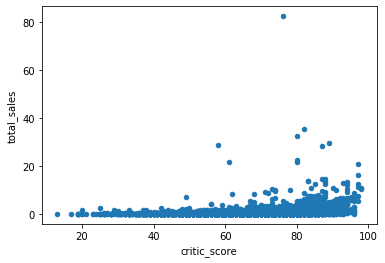

In [40]:
games_new.plot(x='critic_score', y='total_sales', kind='scatter')

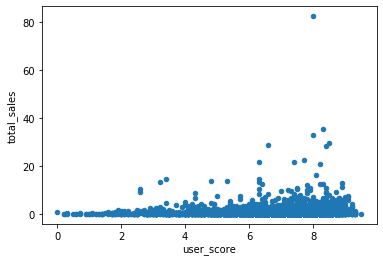

In [41]:
games_new.plot(x='user_score', y='total_sales', kind='scatter')

В целом по всем платформам , также как и на Х360, оценка и продажи явно не коррелируют. При этом чем выше оценка критиков , тем выше сумма и количество продаж. Аналогично с пользовательской оценкой. 

**Посмотрим на общее распределение игр по жанрам**

In [42]:
games_new.pivot_table(index=['genre'], values = 'total_sales', aggfunc = ['count', 'sum', 'mean', 'median'])

,count,sum,mean,median
,total_sales,total_sales,total_sales,total_sales
genre,,,,
Action,2382,1116.65,0.468787,0.160
Adventure,1023,141.35,0.138172,0.040
Fighting,413,188.42,0.456223,0.160
Misc,1253,554.86,0.442825,0.130
Platform,340,279.74,0.822765,0.225
Puzzle,366,89.92,0.245683,0.080
Racing,562,299.00,0.532028,0.170
Role-Playing,996,522.40,0.524498,0.150


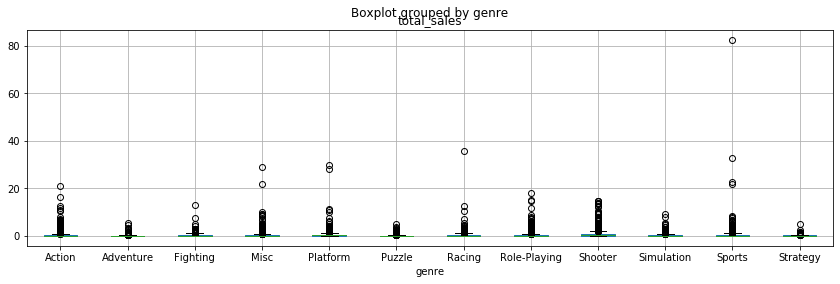

In [43]:
games_new.boxplot('total_sales', by='genre', figsize=(14, 4))

(0, 3)

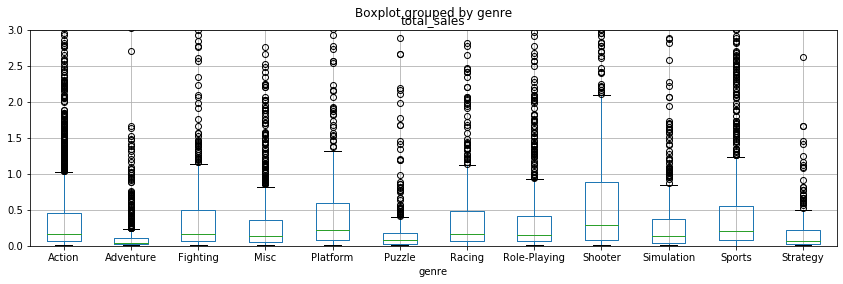

In [44]:
ax = games_new.boxplot('total_sales', by='genre', figsize=(14, 4))
ax.set_ylim(0,3)

Больше всего суммарных продаж в жанре Action. Количество игр в этом жанре также больше других. Кроме того, в этом жанре много игр, продажи которых были значительно выше среднего. На втором и третьем местах по суммарных продажам игры в жанре Sports и Shooter. При этом среднее значение продаж в жанре Shooter выше , чем в других жанрах и выше жанра Action. Также много игр, продажи которых были значительно выше вреднего.  
Ниже всего средние продажи в жанре Adventure и Strategy. 

<div id='id-section4'/>

### Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

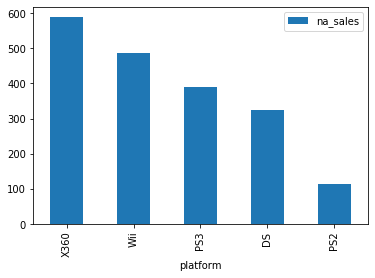

In [45]:
games_new.pivot_table(index=['platform'], values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

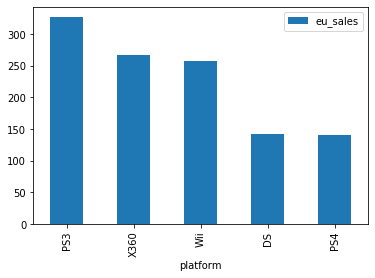

In [46]:
games_new.pivot_table(index=['platform'], values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')

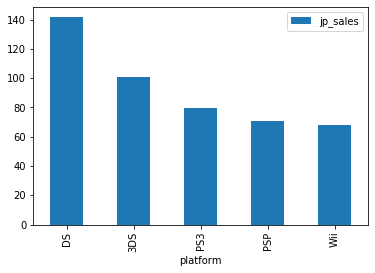

In [47]:
games_new.pivot_table(index=['platform'], values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

Самая популярная платформа в Северной Америке - Х360. Интересно, что на третьем месте PS3, а на пятом - устаревшая PS2. Видимо, в Северной Америке не гонятся за новинками.  
В Европе самая популярная платформа PS3, Х360 на втором. При этом на 5-ом месте новая набираяющая популярность PS4.  
В Японии Х360 не пользуется популярностью. Самая популярная DS. В топ также попали непопулярные для Америки и Европы 3DS и PSP. 

Ниже посмотрим доли распределения продаж между платформами, которые попали в топ-5 каждого региона.


In [48]:
platform_sales = ['X360', 'DS', 'PS2', 'PS3', 'PS4', 'Wii', 'PSP', '3DS']

In [49]:
country = games_new.query('platform in @platform_sales').pivot_table(index=['platform'], values = ['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc = 'sum').reset_index()

In [50]:
country['eu'] = (country['eu_sales']/country['total_sales']).map(lambda x:'{:.2%}'.format(x))
country['jp'] = (country['jp_sales']/country['total_sales']).map(lambda x:'{:.2%}'.format(x))
country['na'] = (country['na_sales']/country['total_sales']).map(lambda x:'{:.2%}'.format(x))

In [51]:
country

,platform,eu_sales,jp_sales,na_sales,total_sales,eu,jp,na
0,3DS,61.27,100.62,82.65,257.81,23.77%,39.03%,32.06%
1,DS,142.99,141.49,323.99,655.35,21.82%,21.59%,49.44%
2,PS2,46.28,35.93,114.89,265.80,17.41%,13.52%,43.22%
3,PS3,327.21,79.41,390.13,931.34,35.13%,8.53%,41.89%
4,PS4,141.09,15.96,108.74,314.14,44.91%,5.08%,34.62%
5,PSP,54.21,70.63,80.54,238.63,22.72%,29.60%,33.75%
6,Wii,258.32,68.28,486.87,891.18,28.99%,7.66%,54.63%
7,X360,267.89,12.02,588.84,952.99,28.11%,1.26%,61.79%


Определим для пользователей каждого региона самые популярные жанры.

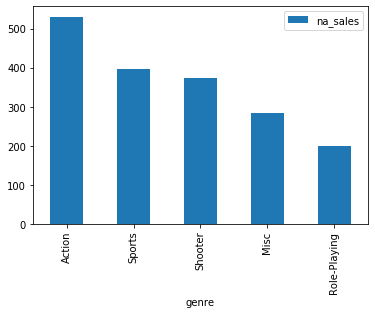

In [52]:
games_new.pivot_table(index=['genre'], values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

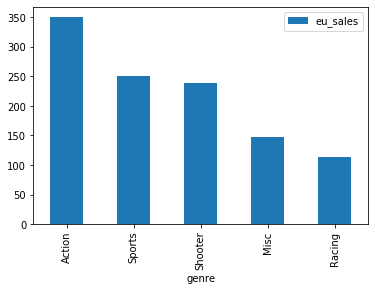

In [53]:
games_new.pivot_table(index=['genre'], values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')

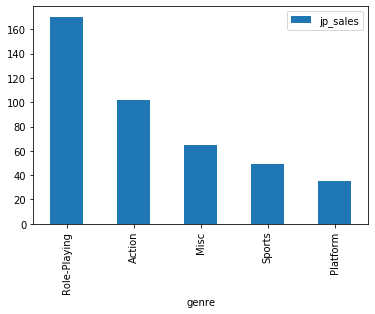

In [54]:
games_new.pivot_table(index=['genre'], values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

Самые популярные жанры в Европе и Северной Америке совпадают - это Action, Sports, Shooter, отличие только в 5-м месте. Американцы больше предпочитают "Role-Playing", а европейцы "Rasing". Топ-3 совпадает с топом жанров в целом по миру. А вот в Японии на первом месте  "Role-Playing". Жанр Shooter не пользуется популярностью в этой стране. Таким образом, предпочтения на Западе и на Востоке разные. 

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

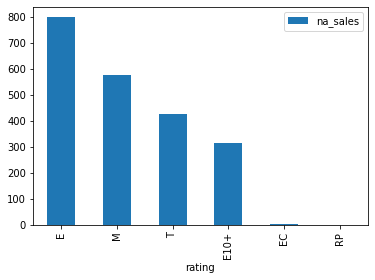

In [55]:
games_new.pivot_table(index=['rating'], values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).plot(kind='bar')

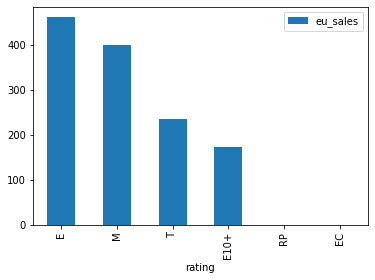

In [56]:
games_new.pivot_table(index=['rating'], values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).plot(kind='bar')

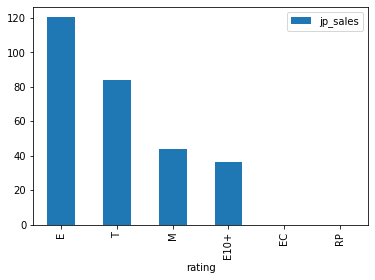

In [57]:
games_new.pivot_table(index=['rating'], values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).plot(kind='bar')

Во всех регионах больше всего продаж игр категории Е - для всех возрастов. Такие игры подходят как детям, так и взрослым. В Европе и Америке на втором месте игры категории М - для взрослых. Согласно википедии "проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории". В Японии игры категории М менее популярны, они на третьем месте.  

<div id='id-section5'/>

### Шаг 5. Проверка гипотез

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются

In [58]:
sample_xone = games_new.query('platform == "XOne" and user_score>0')['user_score']
sample_pc = games_new.query('platform == "PC" and user_score>0')['user_score']

In [59]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем нулевую гипотезу

In [60]:
results = st.ttest_ind(
    sample_xone, 
    sample_pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.014354742043413306
Отвергаем нулевую гипотезу


Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [61]:
sample_action = games_new.query('genre == "Action" and user_score>0')['user_score']
sample_sports = games_new.query('genre == "Sports" and user_score>0')['user_score']

In [62]:
results_2 = st.ttest_ind(
    sample_action, 
    sample_sports)

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.493183815903372e-11
Отвергаем нулевую гипотезу


Вывод: Сформулировали 2 нулевых гипотезы. Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Получили:

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action и Sports одинаковые.

На основе этого сформулировали альтернативные гипотезы:

- средние пользовательские рейтинги платформ Xbox One и PC различаются
- средние пользовательские рейтинги жанров Action и Sports разные.

Чтобы определить, когда отвергать нулевую гипотезу, а когда нет, использовали уровень значимости. Пороговое значение взяли 5%.

Вероятность получить наблюдаемый результат в первом случае равна 1%. То есть нулевую гипотезу отвергли. Делавем вывод, средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Вероятность того, что средние пользовательские рейтинги жанров Action и Sports одинаковые, почти 0%. Вывод: средние пользовательские рейтинги жанров Action и Sports разные

<div id='id-section6'/>

### Шаг 6. Вывод

В предоставленных данных содержалась иноформацию об играх с 1980 года по 2016. Для изучения тенденций был выбран период последних 10 лет: 2006-2016 гг. 

Выявила следующие закономерности:
- в среднем "срок жизни" платформы 10 лет. Новый платформы приходят на смену старым в рамках одного производителя каждые 5 лет. 
- платформы 'X360', 'PS3', 'Wii', 'DS' лидировали по продажам за последние 10 лет
- в последние годы популярностью пользуются PS4 и XOne.Кроме того во всех периодах игроки пользуются компьютером, поэтому несмотря на невысокие продажи, данную платформу рассмотрела тоже, т.к. она не поддается старению. Еще бы добавила WiiU, т.к. предыдущая платформа Wii уже устарела, а на новой платформе продажи идут стабильно. Возможен рост.Таким образом выделила 4 потенциально прибыльные платформы: 'PS4', 'XOne', 'WiiU', 'PC' 
- на новых потенциально прибыльных платформах медиана по продажам примерно на одном уровне , не считая компьютер. Там медиана ниже. При этом у каждой платформы есть игры, продажи которых значительно превышают средние показатели. Больше всего таких игр на платформе PS4.
- Чем выше оценка критиков , тем выше сумма и количество продаж. Аналогично с пользовательской оценкой. 
- больше всего суммарных продаж в жанре Action. Количество игр в этом жанре также больше других. Кроме того, в этом жанре много игр, продажи которых были значительно выше среднего. На втором и третьем местах по суммарных продажам игры в жанре Sports и Shooter. При этом среднее значение продаж в жанре Shooter выше , чем в других жанрах и выше жанра Action. Также много игр, продажи которых были значительно выше вреднего. Ниже всего средние продажи в жанре Adventure и Strategy.

Портреты пользователей в регионах отличаются.
- Самая популярная платформа в Северной Америке - Х360. Интересно, что на третьем месте PS3, а на пятом - устаревшая PS2. Видимо, в Северной Америке не гонятся за новинками.  
В Европе самая популярная платформа PS3, Х360 на втором. При этом на 5-ом месте новая набираяющая популярность PS4.  
В Японии Х360 не пользуется популярностью. Самая популярная DS. В топ также попали непопулярные для Америки и Европы 3DS и PSP.  
- Самые популярные жанры в Европе и Северной Америке совпадают - это Action, Sports, Shooter, отличие только в 5-м месте. Американцы больше предпочитают "Role-Playing", а европейцы "Rasing". Топ-3 совпадает с топом жанров в целом по миру. А вот в Японии на первом месте "Role-Playing". Жанр Shooter не пользуется популярностью в этой стране. Таким образом, предпочтения на Западе и на Востоке разные.
- Во всех регионах больше всего продаж игр категории Е - для всех возрастов. Такие игры подходят как детям, так и взрослым. В Европе и Америке на втором месте игры категории М - для взрослых. Согласно википедии "проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории". В Японии игры категории М менее популярны, они на третьем месте.

Таким образом, лучше рекламную компанию делать разную в зависимости от региона. 
Для Америки и Европы максимально успешными будут игры жанра Action, Sports, Shooter рейтинга Е или М с высокими пользовательскими оценками и высокими оценками критиктов. Рассматривать новые потенциально прибыльные платформы, и старые топовые: 'PS4', 'XOne', 'WiiU', 'PC', 'PS3', 'Х360', 'Wii', 'DS'

В Японии же успешнее будут игры Role-Playing, Action, Sports с рейтингом Е и Т с высокими пользовательскими оценками и высокими оценками критиктов. К платформам добавить 3DS и PSP